Name : Asra Siddiqui

Roll no. : CS-23006

#**Dataset Selection**


**Salary Dataset**

**Source: Kaggle**

**Description:** This dataset contains over 22,000 real-world salary records collected from multiple companies across various job roles, titles, locations, and employment types. It provides insights into salary distribution, compensation trends, and factors such as company ratings and employment status that influence pay. The dataset is well-suited for data cleaning, exploratory data analysis, visualization, and business insights in the jobs and career domain.


##**Data Understanding**

In [ ]:
from google.colab import files #uploading data file
uploaded = files.upload()

Saving Salary Dataset.csv to Salary Dataset.csv


In [ ]:
import pandas as pd
df = pd.read_csv('Salary Dataset.csv')  #reading into dataframe

In [ ]:
df.shape   # data have 22770 entries (row) and 8 features (columns)

(22770, 8)

In [ ]:
df.columns

Index(['Rating', 'Company Name', 'Job Title', 'Salary', 'Salaries Reported',
       'Location', 'Employment Status', 'Job Roles'],
      dtype='object')

These are the main Features/Columns available in the dataset :

1) Company Name : The name of the organization offering the job.

2) Job Roles : The broader role category or functional role related to the job (e.g., Web, Android).

3) Location : The city where the job is based.

4) Salary : The annual salary offered for the role (numerical value).

5) Rating : The company’s average employee rating (usually on a scale of 1 to 5).

6) Employment Status : The type of job role such as Full Time, Intern, Contractor, or Trainee.

7) Salaries Reported : The number of employees who reported their salary for that specific role and company.

8) Job Title : The specific designation or position (e.g., Data Analyst, Data Scientist, Software Engineer).

In [ ]:
df.isnull().sum() # displaying all null values in data


,0
Rating,0
Company Name,1
Job Title,0
Salary,5
Salaries Reported,0
Location,0
Employment Status,0
Job Roles,0


In [ ]:
df.duplicated().sum() # displaying all duplicated values in data

np.int64(4)

In [ ]:
df.describe()  #finding outliers


,Rating,Salary,Salaries Reported
count,22770.000000,2.276500e+04,22770.000000
mean,3.918248,6.954267e+05,1.855775
std,0.528306,8.844794e+05,6.823668
min,-5.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,10.000000,9.000000e+07,361.000000


In [ ]:
df.head() # display top 5 entries of data

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000.0,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000.0,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000.0,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000.0,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000.0,3,Bangalore,Full Time,Android


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22769 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22765 non-null  float64
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.4+ MB


In [ ]:
df.select_dtypes(include='object').nunique() #identify categorical data


,0
Company Name,11258
Job Title,1080
Location,10
Employment Status,4
Job Roles,11


In [ ]:
invalid_ratings = df[(df['Rating'] < 1) | (df['Rating'] > 5)] #since rating is bounded between (1-5), this finds row where rating is exceeding the limit
invalid_ratings


,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
12,7.0,Wibmo,Android Developer,900000.0,2,Bangalore,Full Time,Android
11155,-5.0,PRIME SHIP,Python Developer,120000.0,1,Bangalore,Full Time,Python
11673,7.0,Tweak Talent Technologies,Python Developer Contractor,420000.0,1,Hyderabad,Contractor,Python
11822,10.0,Sage Digital,Python Engineer,800000.0,1,Hyderabad,Full Time,Python
22381,-2.0,Renaissance Technologies,Web Developer,144000.0,1,Bangalore,Full Time,Web
22504,-1.0,Yes Bank,Web Developer - Intern,120000.0,1,Bangalore,Intern,Web
22768,9.0,Accenture,Full Stack Web Developer,300000.0,7,Bangalore,Full Time,Web


##**Data Cleaning:**

In [ ]:
#Remove rows where Company Name is missing
df = df.dropna(subset=['Company Name'])


In [ ]:
#Remove duplicate rows (keep first occurrence)
df = df.drop_duplicates()

In [ ]:
#Fill missing Salary with average Salary (mean)
avg_salary = df['Salary'].mean()
df['Salary'] = df['Salary'].fillna(avg_salary)

In [ ]:
#Clamp Rating between 1 and 5
df.loc[df['Rating'] < 1, 'Rating'] = 1
df.loc[df['Rating'] > 5, 'Rating'] = 5


In [ ]:
# Check cleaning results
print(f"Remaining missing Company Name: {df['Company Name'].isnull().sum()}")
print(f"Remaining duplicates: {df.duplicated().sum()}")
print(f"Remaining missing Salary: {df['Salary'].isnull().sum()}")
print(f"Rating min: {df['Rating'].min()}, max: {df['Rating'].max()}")


Remaining missing Company Name: 0
Remaining duplicates: 0
Remaining missing Salary: 0
Rating min: 1.0, max: 5.0


##**Feature Engineering**

In [ ]:
df['Salary_per_Report'] = df['Salary'] / df['Salaries Reported'] #creates new feature
# Normalizes salary by how many people reported it, giving a more better insight into salary per employee rather than just total salary, which helps reduce bias from job roles with few reports.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Salary_scaled'] = scaler.fit_transform(df[['Salary']])
# Scaling salary standardizes its wide range, preventing large values from dominating analyses or models. This ensures features contribute equally and improves the performance of machine learning algorithms.

In [ ]:
df = pd.get_dummies(df, columns=['Employment Status'], drop_first=True)
# Encoding categorical variable employment status. it converts text labels into numeric form that models can process. One-hot encoding preserves category uniqueness without implying any order, enabling accurate analysis.

##**Exploratory Data Analysis**

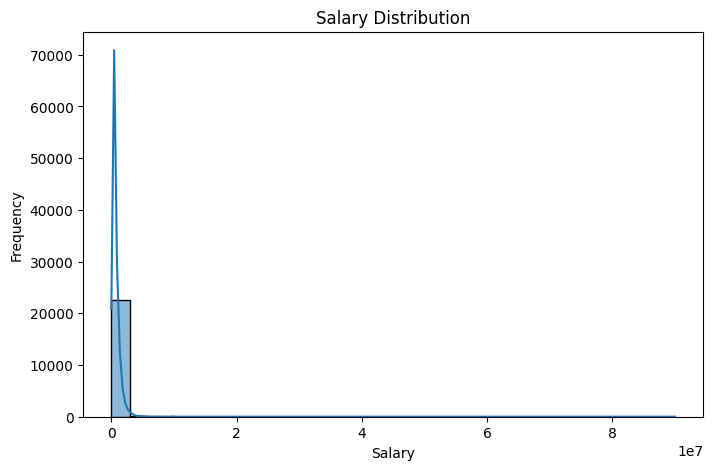

In [ ]:
# The histogram shows how salaries are spread across the dataset. The curve helps visualize the salary density. Peaks indicate common salary ranges, and any skewness reveals if most employees earn low, medium, or high salaries.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


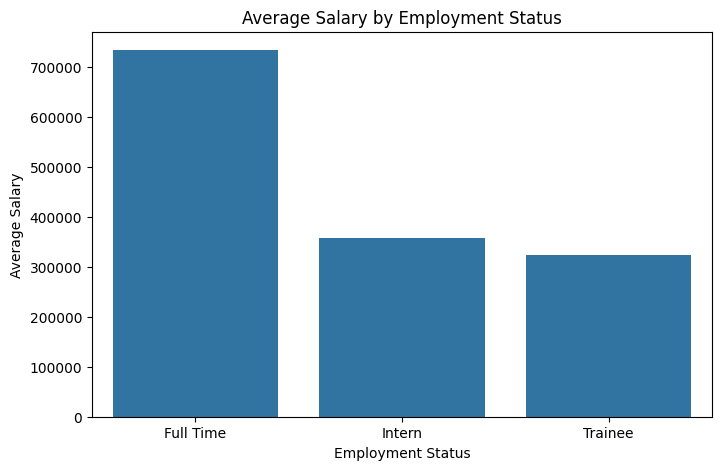

In [ ]:
# This bar chart compares average salaries across different employment types. It reveals which employment categories (e.g., Full Time, Intern) tend to offer higher pay.

records = []
for col in df.columns:
    if col.startswith('Employment Status_'):
        avg_salary = df.loc[df[col] == 1, 'Salary'].mean()
        records.append({'Employment Status': col.replace('Employment Status_', ''),
                        'Average Salary': avg_salary})
df_grouped = pd.DataFrame(records)
plt.figure(figsize=(8,5))
sns.barplot(x='Employment Status', y='Average Salary', data=df_grouped)
plt.title('Average Salary by Employment Status')
plt.show()

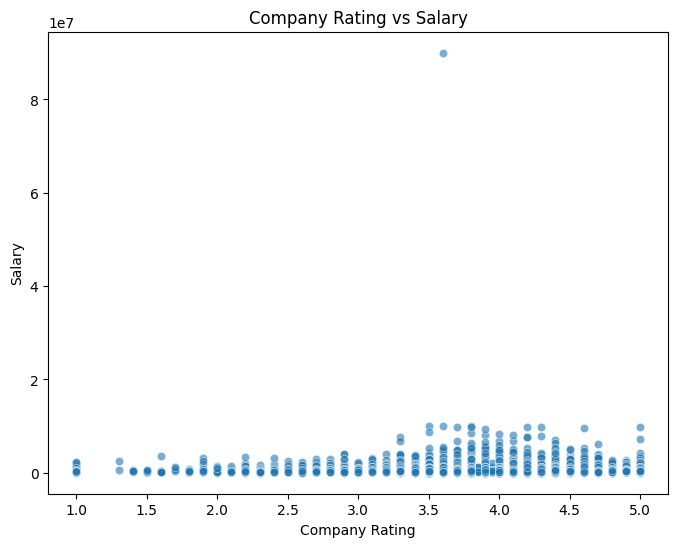

In [ ]:
# This scatter plot shows the relationship between company ratings and salaries. We can check if higher-rated companies generally pay better or if there’s no clear pattern.
#From output salary and ratings show no clear pattern
plt.figure(figsize=(8,6))
sns.scatterplot(x='Rating', y='Salary', data=df, alpha=0.6)
plt.title('Company Rating vs Salary')
plt.xlabel('Company Rating')
plt.ylabel('Salary')
plt.show()


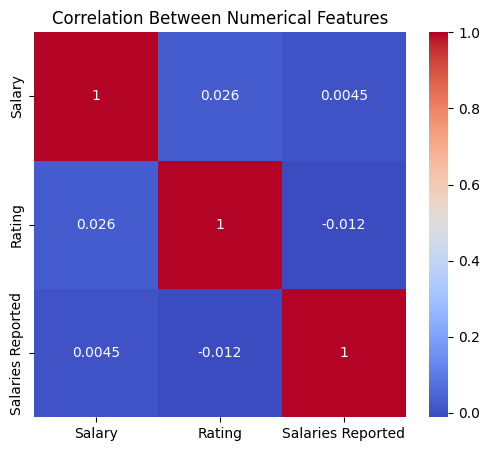

In [ ]:
# The heatmap reveals the strength and direction of relationships between numeric features.
#there's weak relation between salary and rating and inverse relation between salaries reported and ratings
plt.figure(figsize=(6,5))
corr = df[['Salary', 'Rating', 'Salaries Reported']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()



#**Conclusion**
##*Key Findings

-The dataset contains over 22,000 salary records across multiple companies, job roles, locations, and employment types, providing a comprehensive view of real-world compensation trends.


-Salary distribution is highly right-skewed, with most salaries concentrated in lower ranges and a few extreme high-salary outliers.

-Full-time employees earn significantly higher salaries compared to interns and trainees, highlighting the strong impact of employment status on compensation.

-Company ratings show a very weak correlation with salary, indicating that higher-rated companies do not necessarily offer higher pay.

-Certain job roles and titles appear more frequently, reflecting higher demand and reporting in those positions.

---
##*Important Insights

-Employment status plays a major role in salary variation, making it a critical feature for compensation analysis.

-The number of salaries reported does not strongly influence salary levels, suggesting pay is driven more by role and company factors.

-Salary outliers significantly affect averages, emphasizing the importance of using median values and transformations for analysis.

---
##*What I Learned from This Analysis

-How to clean a large real-world dataset by handling missing values, duplicates, and inconsistent entries.

-The importance of feature engineering, scaling, and encoding in preparing data for analysis and modeling.

-How EDA and visualizations help identify skewed distributions, weak correlations, and meaningful patterns.

-How salary data can be used to understand compensation structures and workforce trends.